#  The Spark Foundation
## TASK 2
### Prediction using Decicion Tree Algorithm
#### Author: Abhishek Dubey                                                                                               
##### linkedin: www.linkedin.com/in/abhishek-dubey96

## Importing the necessary libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [51]:
dt = pd.read_csv("Iris.csv")

In [52]:
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Checking out the dataset for any outlier/missing values

In [53]:
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [54]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [55]:
dt = dt.drop("Id", axis=1)

## Here 'Id' is an unnecessary column

In [56]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Species is ou target variable checking out unique values

In [57]:
dt.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [58]:
dt.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Renaming the values of target variable into numerical values as model accepts only numerical values

In [59]:
dt.loc[dt['Species']=='Iris-setosa','Species'] = 0
dt.loc[dt['Species']=='Iris-versicolor','Species'] = 1
dt.loc[dt['Species']=='Iris-virginica','Species'] = 2

In [60]:
dt.Species.unique()

array([0, 1, 2], dtype=object)

## Data Vizualization

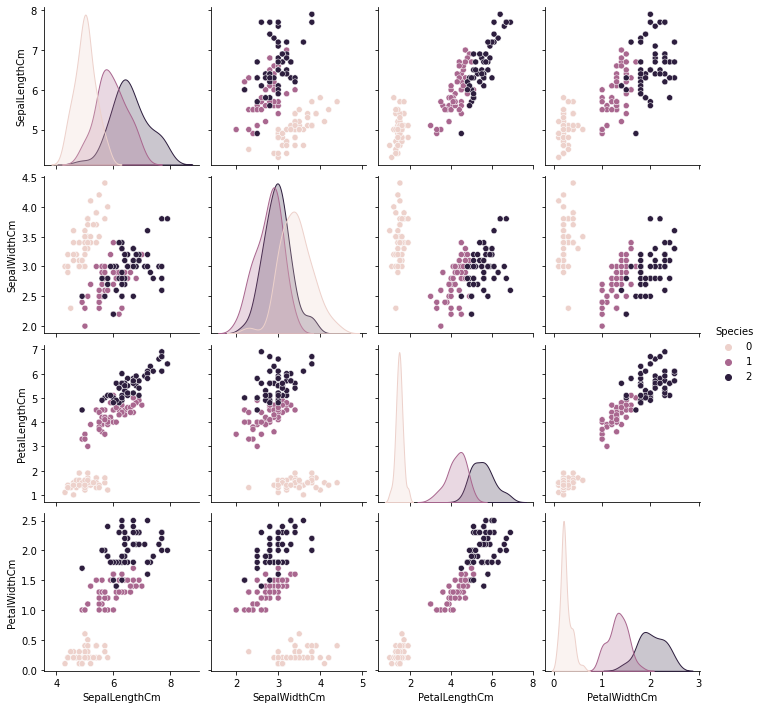

In [61]:
sns.pairplot(data=dt,hue='Species')

<AxesSubplot:>

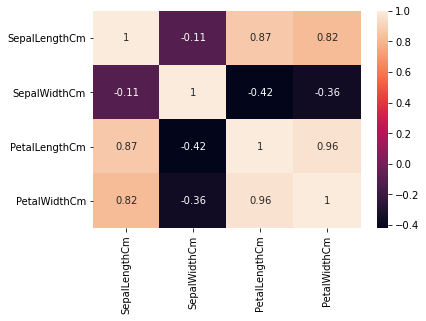

In [62]:
sns.heatmap(dt.corr(),annot=True)

## Preparing the data for model building

In [63]:
## X is our independent variable
X = dt.drop(['Species'],axis=1)

In [64]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [65]:
## Y is our dependent/target variable 
Y=dt.Species

In [66]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: object

In [67]:
## We can see that our datatype is object. So, in order to be accpeted by our model I will change it into integer.
Y=Y.astype('str').astype('int')

In [68]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

## Splitting the data into test and train split

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.3, random_state=0) 

In [70]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [71]:
Y_train

60     1
116    2
144    2
119    2
108    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: Species, Length: 105, dtype: int32

## Importing the model and fitting it

In [72]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [73]:
model.fit(X_train, y_train)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [74]:
y_pred = model.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


## Model Validation

In [75]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [76]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [77]:
print("Classification report:")
print(classification_report(Y_test,y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [78]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

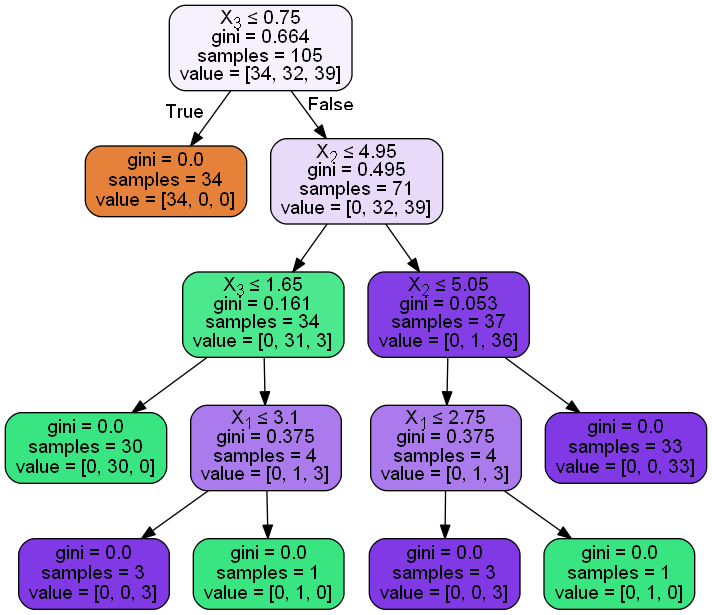

In [79]:
import graphviz 
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## From here on data we would feed into the model would be classified accordingly

# Thank you